     0
0  150
1  234
2   81
3  392
4  383


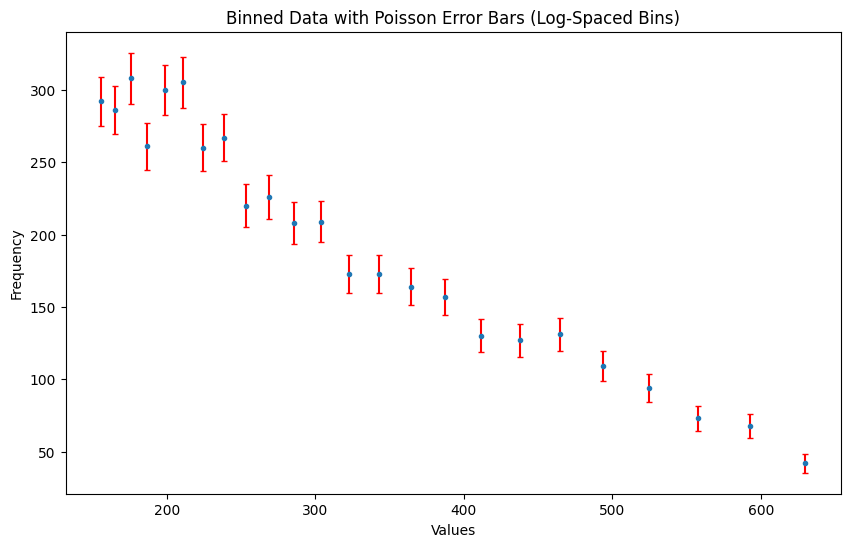

In [34]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the directory containing the data files
data_path = '/home/ema/Documents/GitHub/MuonLifetimeBayesianAnalysis/g-2data/data/precession/2023_24/'

# Use glob to get a list of all .dat files in the directory
file_list = glob.glob(data_path + '*.dat')

# Initialize an empty list to store the data from each file
data_list = []

# Loop through the list of files and read the data into pandas DataFrames
for file in file_list:
    # Check if the file is not empty
    if os.path.getsize(file) > 0:
        data = pd.read_csv(file, header=None)
        data_list.append(data)

# Concatenate all DataFrames into a single DataFrame
if data_list:
    merged_data = pd.concat(data_list, ignore_index=True)

    # Print the first few rows of the merged DataFrame to verify
    print(merged_data.head())

    # Define the number of bins
    num_bins = 25

    # Filter the data to the desired range
    filtered_data = merged_data[(merged_data[0] < 650) & (merged_data[0] > 150)]
    #filtered_data = merged_data
    # Calculate the logarithmically spaced bin edges
    min_value = filtered_data[0].min()
    max_value = filtered_data[0].max()
    bin_edges = np.logspace(np.log10(min_value), np.log10(max_value), num_bins)

    # Bin the data using numpy.histogram
    counts, bin_edges = np.histogram(filtered_data[0], bins=bin_edges)

    # Calculate the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Calculate the Poisson error as the square root of the counts
    errors = np.sqrt(counts)

    # Plot the binned data with error bars
    plt.figure(figsize=(10, 6))
    plt.errorbar(bin_centers, counts, yerr=errors, fmt='.', ecolor='red', capsize=2, capthick=1, markeredgewidth=1)
    plt.title('Binned Data with Poisson Error Bars (Log-Spaced Bins)')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No valid data files found.")
